<font size="5">4.10: Part 2: Coding Etiquette & Excel Reporting

This script contains the following points:
1.  Import libraries and dataframe
2.  Create age, income bracket, and parental status flags  
3. Import departments file and merge
4. Create visualizations
       -Generations
       -Family status
       -Income brackets
       -Hours of day and busiest day of week
       -Parental status
       -Spending flag
       -Regions
       -Loyalty
       -Frequency
5. Aggregate max, mean, min for several key variables
6. Export df's
</font>

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a shortcut for project folder path as a string.
path = r'/Users/cboyd/Documents/01-2022 Instacart Basket Analysis'

In [3]:
# Check path worked
path

'/Users/cboyd/Documents/01-2022 Instacart Basket Analysis'

In [4]:
# Import the “orders_products_customers_merged_4.9.1.pkl” data set into your notebook using the os library.
df_opc_merged_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_4.10.1.pkl'))

In [5]:
# Check work
df_opc_merged_2.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order  first_time_customer  product_id  add_to_cart_order  \
0                     NaN                 True         196                  1   
1                     NaN                 True       14084                  2   
2                     NaN                 True       12427                  3   
3                     NaN                 True       26088                  4   
4                     NaN                 True       26405                  5   

   reordered  ...         frequency_flag  gender    state  age date_joined  \
0          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
1          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
2          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
3          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
4          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   

  number_of_dependants fam_status  income region          exclusion_flag  
0                    3    married   40423  South  high activity customer  
1                    3    married   40423  South  high activity customer  
2                    3    married   40423  South  high activity customer  
3                    3    married   40423  South  high activity customer  
4                    3    married   40423  South  high activity customer  

[5 rows x 32 columns]

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Create age, income, parental flags

In [6]:
# Find min age
df_opc_merged_2['age'].min()

18

In [7]:
# Find max age
df_opc_merged_2['age'].max()

81

In [8]:
# Create age brackets by generation
df_opc_merged_2.loc[(df_opc_merged_2['age'] >= 18) & (df_opc_merged_2['age'] <= 24), 'Generation'] = 'Generation Z 18-24'
df_opc_merged_2.loc[(df_opc_merged_2['age'] >= 25) & (df_opc_merged_2['age'] <= 40), 'Generation'] = 'Millenials 25-40'
df_opc_merged_2.loc[(df_opc_merged_2['age'] >= 41) & (df_opc_merged_2['age'] <= 56), 'Generation'] = 'Generation X 41-56'
df_opc_merged_2.loc[(df_opc_merged_2['age'] >= 57) & (df_opc_merged_2['age'] <= 75), 'Generation'] = 'Baby Boomers 57-75'
df_opc_merged_2.loc[(df_opc_merged_2['age'] > 75), 'Generation'] = 'The Silent Generation >75'

In [9]:
#Create income brackets by income bracket
df_opc_merged_2.loc[(df_opc_merged_2['income'] >= 0) & (df_opc_merged_2['income'] < 50000), 'Income Bracket'] = 'Low <50k'
df_opc_merged_2.loc[(df_opc_merged_2['income'] >= 50000) & (df_opc_merged_2['income'] < 75000), 'Income Bracket'] = 'Middle Low 50k-74k'
df_opc_merged_2.loc[(df_opc_merged_2['income'] >= 75000) & (df_opc_merged_2['income'] < 100000), 'Income Bracket'] = 'Middle 75k-99k'
df_opc_merged_2.loc[(df_opc_merged_2['income'] >= 100000) & (df_opc_merged_2['income'] < 150000), 'Income Bracket'] = 'Middle High 100k-149k'
df_opc_merged_2.loc[df_opc_merged_2['income'] > 150000, 'Income Bracket'] = 'High 150k+'

In [10]:
# Check number of "users" by their ID to check work 
# (shape didnt work), but thats ok BC I need unique counts anyways
df_opc_merged_2['user_id'].unique()

array([     1,      2,      3, ..., 206207, 206208, 206209])

In [11]:
# Check Generation flag
# Unique didnt work great so use "nunique" as I think it stands for #unique
df_opc_merged_2.groupby('Generation')['user_id'].nunique()

Generation
Baby Boomers 57-75           60821
Generation X 41-56           51983
Generation Z 18-24           22560
Millenials 25-40             51404
The Silent Generation >75    19441
Name: user_id, dtype: int64

In [12]:
Total_gen = (60821+51983+22560+51404+19441)

In [13]:
Total_gen

206209

In [14]:
# Check income flag 
df_opc_merged_2.groupby('Income Bracket')['user_id'].nunique()

Income Bracket
High 150k+               23251
Low <50k                 34105
Middle 75k-99k           42097
Middle High 100k-149k    64004
Middle Low 50k-74k       42749
Name: user_id, dtype: int64

In [15]:
Total_inc = (23251+34105+42097+64004+42749)

In [16]:
Total_inc

206206

In [17]:
# Check dependant numbers
df_opc_merged_2.groupby('number_of_dependants')['user_id'].nunique()

number_of_dependants
0    51602
1    51531
2    51482
3    51594
Name: user_id, dtype: int64

In [18]:
# Create flag for "parent" (1+ children)
df_opc_merged_2.loc[(df_opc_merged_2['number_of_dependants'] >= 1), 'parental_status'] = 'parent'

In [19]:
# Create flag for "non-parent" (0 children)

df_opc_merged_2.loc[(df_opc_merged_2['number_of_dependants'] == 0), 'parental_status'] = 'non-parent'

In [20]:
# Check parental status flag
df_opc_merged_2.groupby('parental_status')['user_id'].nunique()

parental_status
non-parent     51602
parent        154607
Name: user_id, dtype: int64

## Import departments file and join to main df

In [21]:
#Import departments file as dataframe
departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col=0)

In [22]:
#Check work
departments.head(25)

1      2       3        4        5              6  \
department_id                                                           
department     frozen  other  bakery  produce  alcohol  international   

                       7     8                9    10  ...            12  \
department_id                                          ...                 
department     beverages  pets  dry goods pasta  bulk  ...  meat seafood   

                   13         14            15          16         17      18  \
department_id                                                                   
department     pantry  breakfast  canned goods  dairy eggs  household  babies   

                   19    20       21  
department_id                         
department     snacks  deli  missing  

[1 rows x 21 columns]

In [23]:
# Transpose from wide to long format
departments.T

department_id       department
1                       frozen
2                        other
3                       bakery
4                      produce
5                      alcohol
6                international
7                    beverages
8                         pets
9              dry goods pasta
10                        bulk
11               personal care
12                meat seafood
13                      pantry
14                   breakfast
15                canned goods
16                  dairy eggs
17                   household
18                      babies
19                      snacks
20                        deli
21                     missing

In [24]:
# Look for a key in df_opc_merged_2 variables
df_opc_merged_2.dtypes

order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
first_time_customer          bool
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                  float64
department_id             float64
prices                    float64
price_range_location       object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
spending                  float64
spending_flag              object
frequency                 float64
frequency_flag             object
gender                     object
state                      object
age                         int64
date_joined                object
number_of_dependants        int64
fam_status                 object
income        

In [25]:
#Add departments to main dataframe
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 1, 'department_name'] = 'frozen'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 2, 'department_name'] = 'other'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 3, 'department_name'] = 'bakery'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 4, 'department_name'] = 'produce'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 5, 'department_name'] = 'alcohol'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 6, 'department_name'] = 'international'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 7, 'department_name'] = 'beverages'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 8, 'department_name'] = 'pets'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 10, 'department_name'] = 'bulk'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 11, 'department_name'] = 'personal care'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 12, 'department_name'] = 'meat seafood'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 13, 'department_name'] = 'pantry'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 14, 'department_name'] = 'breakfast'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 15, 'department_name'] = 'canned goods'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 16, 'department_name'] = 'dairy eggs'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 17, 'department_name'] = 'households'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 18, 'department_name'] = 'babies'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 19, 'department_name'] = 'snacks'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 20, 'department_name'] = 'deli'
df_opc_merged_2.loc[df_opc_merged_2['department_id'] == 21, 'department_name'] = 'missing'

In [26]:
# Check work
df_opc_merged_2['department_name'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

### 6. Create an appropriate visualization to show the distribution of profiles.

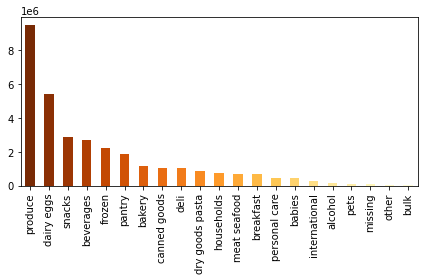

In [27]:
# Create visual to show which departments sell the most
top_selling_departments_bar = df_opc_merged_2['department_name'].value_counts().plot.bar(color = sns.color_palette('YlOrBr_r', 21))
plt.tight_layout()

In [28]:
# Export top selling departments bar graph
top_selling_departments_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_selling_departments_bar.png'))

#### The top 5 selling departments are produce, dairy/eggs, snacks, beverages, and frozen,  I will check to see the % of sales these  departments make up of the total sales, by department. 

In [29]:
# Check to see how much sales the top departments make up out of totals sales
dept_sales = df_opc_merged_2.groupby('department_name').agg({'prices': ['sum']})

In [30]:
dept_sales

prices
                         sum
department_name             
alcohol            1251654.3
babies             3237160.6
bakery             9208026.0
beverages         20646135.1
breakfast          5644626.0
bulk                288648.6
canned goods       8053132.0
dairy eggs       180747527.3
deli               8177351.8
dry goods pasta    6369953.6
frozen            17289206.8
households         5454352.7
international      2068472.7
meat seafood      11551570.3
missing             598845.2
other               253708.0
pantry            15020660.8
personal care      3579129.9
pets                770888.4
produce           75660934.5
snacks            12345538.0

In [31]:
Top_5_dept_sales = (75660934.5+180747527.3+12345538.0+20646135.1+17289206.8)

In [32]:
Total_sales = (1251654.3+3237160.6+9208026.0+20646135.1+5644626.0+288648.6+8053132.0+180747527.3+8177351.8+6369953.6+17289206.8+5454352.7+2068472.7+11551570.3+598845.2+253708.0+15020660.8+3579129.9+770888.4+75660934.5+12345538.0)

In [33]:
Top_5_dept_percentage = Top_5_dept_sales/Total_sales

In [34]:
Top_5_dept_percentage

0.789993557338723

#### The top 5 departments account for ~79% of total sales! I will create a subset to analyze the departments vs customer profiles in order to pin point more-relevant marketing strategies. These 5 departments will be flagged as "High performing dept."

## Generation Visuals

In [35]:
# Crosstab for department name and age group for visualization
dept_sales_age = pd.crosstab(df_opc_merged_2['department_name'], df_opc_merged_2['Generation'], dropna = False)

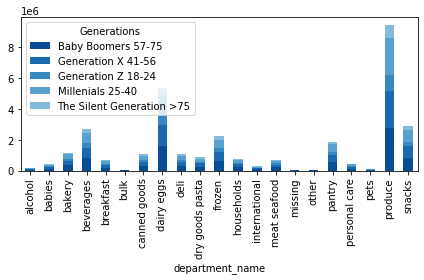

In [36]:
dept_sales_age_bar = dept_sales_age.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 8))
plt.legend(title = 'Generations', loc='upper left')
plt.tight_layout()

#### There is not a lot of differences present between the spending habits of each generation, although the silent generation (75+) and Generation Z (18-24) are the lowest on average across the departments. 

In [37]:
# Export dept_sales_age_bar
dept_sales_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_sales_age_bar.png'))

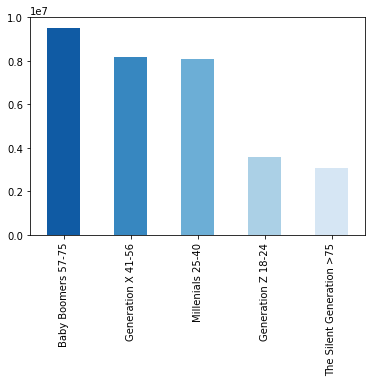

In [38]:
# Total orders per generation
age_orders_bar = df_opc_merged_2['Generation'].value_counts().plot.bar(color = sns.color_palette('Blues_r', 5))

#### Baby boomers (57-75) place the most orders, followed by Generation x (41-56), Millenials (25-40), Generation Z (18-24), and lastly the silent generation (75+). This makes a lot of sense since Gen Z doesnt care about shopping for groceries, and the silent generation is too old for technology and doing things "differently" from traditional shopping, and the other generations use it for convinience and time saving and they are traditionally mostly busy working and have kids/grandkids. 

In [39]:
# Export age_orders_bar
age_orders_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_orders_bar.png'))

In [40]:
# Crosstab for generation and orders_day_of_week
age_day = pd.crosstab(df_opc_merged_2['orders_day_of_week'], df_opc_merged_2['Generation'], dropna = False)

[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday')]

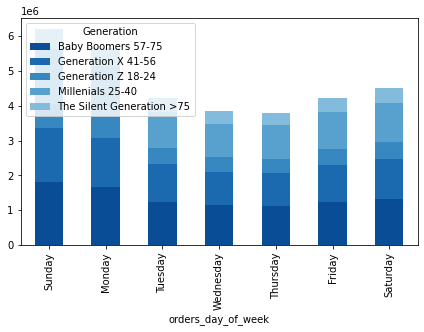

In [41]:
# Create a visual showing generations shopping orders by day of week
age_day_bar = age_day.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 8))
plt.legend(title = 'Generation', loc='upper left')
plt.tight_layout()
age_day_bar.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

#### Sunday is the most popular day of the week for all generations to shop, followed by Monday (which is strange), and them Saturday. The main target demographic for marketing campaigns should be geared towards baby boomers (57-75) for all products. Other groups can be considered based on more target campaigns for specific products intended for a specific group, or perhaps to increase sales with a certain generation. 

In [42]:
# Export age_day_bar
age_day_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_day_bar.png'))

## Family Status Visuals

In [43]:
# Crosstab for family status and department 
family_status_department = pd.crosstab(df_opc_merged_2['department_name'], df_opc_merged_2['fam_status'], dropna = False)

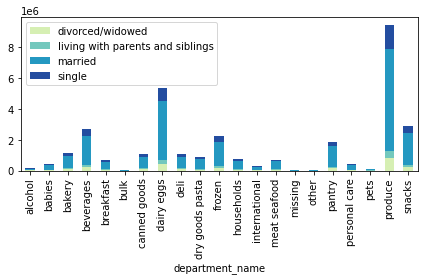

In [44]:
# Create visual for family status and department name
family_status_department_bar = family_status_department.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [45]:
# Export family_status_department_bar
family_status_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_department_bar.png'))

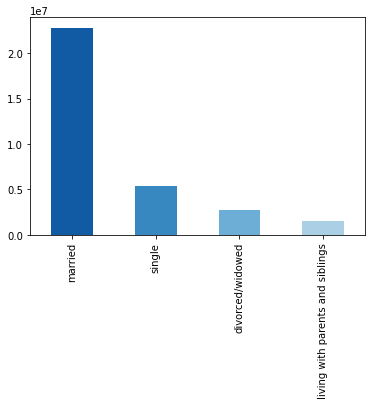

In [46]:
# Create a visual for total orders per Income Bracket
fam_status_orders_bar = df_opc_merged_2['fam_status'].value_counts().plot.bar(color = sns.color_palette('Blues_r', 5))

#### Shoppers with a married family status are the most common shoppers, which makes sense. Single shoppers are next, followed by divorced/widowed. Lastly is the living with parents/siblings shopers, which also makes sense as their parents and siblings probably do the majority of the shopping for the household. Marketing campaigns should be geared towards married couples as they are hands down the most popular group. 

In [59]:
# Export family_status_department_bar
fam_status_orders_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','fam_status_orders_bar.png'))

## Income Bracket Visuals

In [51]:
# Create a visual for income brackets and department names
department_name_income_bar = department_name_income.plot.bar(stacked = True, color = sns.color_palette('Greens_r', 7))
plt.legend(title = 'Income Bracket',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

NameError: name 'department_name_income' is not defined

In [52]:
# Export department name and income for visualization
department_name_income_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_name_income_bar.png'))

NameError: name 'department_name_income_bar' is not defined

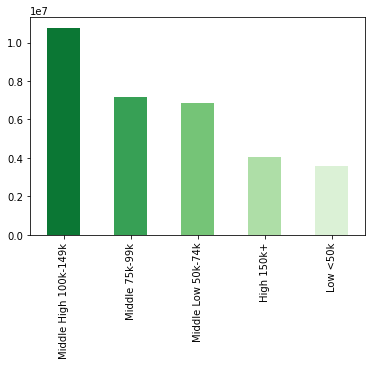

In [57]:
# Create a visual for total orders per Income Bracket
income_orders_bar = df_opc_merged_2['Income Bracket'].value_counts().plot.bar(color = sns.color_palette('Greens_r', 5))

#### This visual further illustrates that Instacart's shoppers placing the most orders fall into the middle high income bracket, making between 100k and 149k. The middle (75k-99k) and middle low (50k-74k) income brackets were close to each other for 2nd and 3rd, followed by high incomes (150k+)-- which makes sense that they are next to last as they probably have private chefs and eat out a little more often due to more disposable income. Low income shoppers are placing the least amount of orders, which would be assumed as they have less money to spend on luxury items. Shoppers making between 50k and 149k is the target demograhic. 

In [58]:
# Export total orders per age group
income_orders_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_orders_bar.png'))

## Hours of day and busiest day of the week

In [ ]:
# Create a visual for busiest hours of the day
busiest_hours_bar = df_opc_merged_2['order_hour_of_day'].value_counts().sort_index().plot.bar(color = sns.color_palette('Greys', 1))

#### Shoppers are making purchases most often between 9am and 5pm, which are considered standard working hours. This could lead to a inferance that shoppers are stay at home parents, work from home, or work non traditonal hours. With this information, marketing materials could be created accordingly. For example, place tv ads to run in the morning from 6am-8am to remind buyers to shop for that day. Run facebook ads during 9am-8pm to encourage shopping while buyers are sitting around the house surfing facebook. 

In [ ]:
# Export busiest hours of the day
busiest_hours_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_hours_bar.png'))

In [ ]:
# Create a visual for busiest day of the week
busiest_day_of_week_bar = df_opc_merged_2['orders_day_of_week'].value_counts().sort_index().plot.bar(color = sns.color_palette('Greys', 7))
busiest_day_of_week_bar.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

#### Sunday is the most popular day of the week for shoppers to place orders, followed by Monday (which is strange), and them Saturday. The main target demographic for marketing campaigns should be geared towards orders being placed on busy days or to try and increase sales on the slower weekdays. 

In [ ]:
# Export busiest day of week
busiest_day_of_week_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_day_of_week_bar.png'))

## # Instacart also wants to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [ ]:
# Create a visual for mean price per hour
price_per_hour = df_opc_merged_2.groupby('order_hour_of_day').agg({'prices': ['mean']})

In [ ]:
# Create a line chart of mean prices per hour of the day 
avg_price_per_hour_line = price_per_hour.plot.line(legend = False,color = sns.color_palette('Blues',1))
plt.ylabel('mean_price')

#### The most expensive items are being purchased around 2am! It is pretty steady thoughout the day, and then around 5pm to 7pm as well, but not nearly as high as 2am! 1am and midnight are the lowest hours.I would be sure to include some marketing during off hours late at night to catch those late night shoppers.

In [ ]:
# Export avg_price_per_hour_line
avg_price_per_hour_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','avg_price_per_hour_line.png'))

In [ ]:
# Create a visual for mean price per weekday
avg_prices_by_day = df_opc_merged_2.groupby('orders_day_of_week').agg({'prices': ['mean']})

In [ ]:
# Create a line chart of mean prices per weekday
avg_prices_by_day_line = avg_prices_by_day.plot.line(legend = False, color = sns.color_palette('Blues', 1))
plt.ylabel('mean_price')
avg_prices_by_day_line.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

#### Shoppers are spending the most on higher ticket items on Saturdays. It is fairly consistent throughout the week, except for monday where it is the lowest day. 

In [ ]:
# Export avg_prices_by_day_line
avg_prices_by_day_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','avg_prices_by_day_line.png'))

In [ ]:
# Create part_of_day by order hour of day
df_opc_merged_2.loc[(df_opc_merged_2['order_hour_of_day'] >= 6) & (df_opc_merged_2['order_hour_of_day'] <= 11), 'part_of_day'] = 'Morning'
df_opc_merged_2.loc[(df_opc_merged_2['order_hour_of_day'] >= 11) & (df_opc_merged_2['order_hour_of_day'] <= 15), 'part_of_day'] = 'Afternoon'
df_opc_merged_2.loc[(df_opc_merged_2['order_hour_of_day'] >= 15) & (df_opc_merged_2['order_hour_of_day'] <= 19), 'part_of_day'] = 'Evening'
df_opc_merged_2.loc[(df_opc_merged_2['order_hour_of_day'] >= 19) & (df_opc_merged_2['order_hour_of_day'] <= 24), 'part_of_day'] = 'Late Night'
df_opc_merged_2.loc[(df_opc_merged_2['order_hour_of_day'] >= 0) & (df_opc_merged_2['order_hour_of_day'] <= 6), 'part_of_day'] = 'Over Night'

In [ ]:
# Crosstab for department name and for part of the day visualization
dept_name_part_of_day = pd.crosstab(df_opc_merged_2['department_name'], df_opc_merged_2['part_of_day'], dropna = False)

In [ ]:
dept_name_part_of_day_bar = dept_name_part_of_day.plot.bar(stacked = True, color = sns.color_palette('rainbow', 5))
plt.legend(title = 'part_of_day',loc='upper left')
plt.xticks(rotation=100, horizontalalignment="center")

In [ ]:
# Create a visual pie graph for part_of_day orders
part_of_day_pie = df_opc_merged_2['part_of_day'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 5))
plt.tight_layout()
plt.ylabel('')

#### 33% of orders are placed in the afternoon, which is the highest. However, the evening and morning orders are close for 2nd and 3rd most busy times. Late night is quite a bit slower, and over night is the slowest time.

In [ ]:
# Export part_of_day_pie
part_of_day_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','part_of_day_pie.png'))

In [54]:
# Crosstab for department name and day of week visualization
dept_name_dow = pd.crosstab(df_opc_merged_2['department_name'], df_opc_merged_2['orders_day_of_week'], dropna = False)

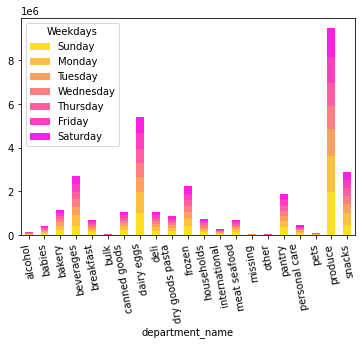

In [55]:
dept_name_dow_bar = dept_name_dow.plot.bar(stacked = True, color  = sns.color_palette('spring_r', 7))
plt.legend(title = 'Weekday',loc='upper left')
plt.xticks(rotation= 100, horizontalalignment="center")
legend_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.legend(labels = legend_labels, title = 'Weekdays', loc = 'upper left')
plt.show()

In [56]:
# Export dept_name_dow_bar
dept_name_dow_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_dow_bar'))

## PARENTAL STATUS

In [213]:
# Crosstab for department name and parental status visualization
dept_name_parental_status = pd.crosstab(df_opc_merged_2['department_name'], df_opc_merged_2['parental_status'], dropna = False)

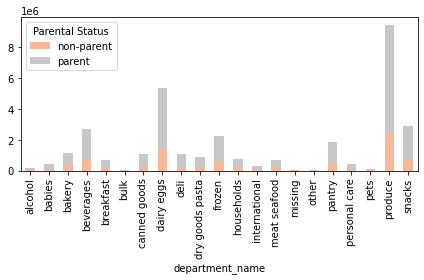

In [215]:
# Create a visual for department name and parental status
dept_name_parental_status_bar = dept_name_parental_status.plot.bar(stacked = True, color = sns.color_palette('RdGy', 2))
plt.legend(title = 'Parental Status',loc='upper left')
plt.tight_layout()

#### Parents are significantly more likely to shop with Instacart, than non-parents. I am sure they are busy with kids and activities and such and use the brand to save precious time. 

In [217]:
# Export department name and parental status visualization
dept_name_parental_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_name_parental_status_bar.png'))

In [221]:
# Crosstab for weekday and parental status visualization
weekday_parental_status= pd.crosstab(df_opc_merged_2['orders_day_of_week'], df_opc_merged_2['parental_status'], dropna = False)

[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday')]

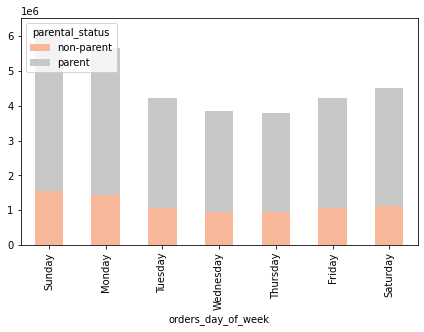

In [224]:
# # Create a visual for orders day of week and parental status
weekday_parental_status_bar = weekday_parental_status.plot.bar(stacked = True, color = sns.color_palette('RdGy', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()
weekday_parental_status_bar.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

#### Parents prefer to place orders more on Sunday, and Monday. Although the same is for non-parents, non-parents shop more consistantly on each day of the week and there is not such a different on preference to day, as there is with parent shoppers. 

In [226]:
# Export weekday_parental_status_bar
weekday_parental_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'weekday_parental_status_bar.png'))

## SPENDING FLAG

In [227]:
# crosstab generations and spending flag
age_spending_flag = pd.crosstab(df_opc_merged_2['Generation'], df_opc_merged_2['spending_flag'], dropna = False)

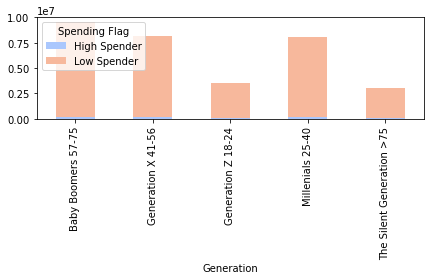

In [248]:
# Create a visual for generation and spending flag
age_spending_flag_bar = age_spending_flag.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',2))
plt.legend(title = 'Spending Flag',loc='upper left')
plt.tight_layout()

#### Low spenders are much more prevalent across all the generations. Keep this in mind when marketing specific items to specific groups.

In [246]:
# Export age_spending_flag_bar
age_spending_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending_flag_bar.png'))

In [247]:
# crosstab number of dependants and spending flag
number_of_dependants_spending_flag = pd.crosstab(df_opc_merged_2['number_of_dependants'], df_opc_merged_2['spending_flag'], dropna = False)

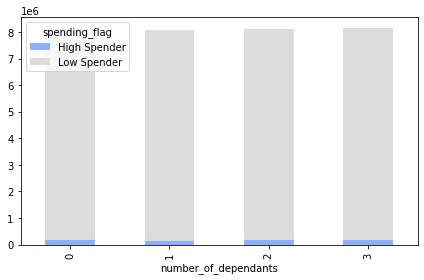

In [249]:
# Create a visual for number of dependants and spending flag
bar_number_of_dependants_spending_flag_bar  = number_of_dependants_spending_flag .plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.legend(title = 'Spending Flag',loc='upper left')
plt.tight_layout()

#### The results are spread evenly across the board. The number of dependents do not have much correlation with how many orders are placed, or being a high or low spender. 

In [250]:
# Export number of dependants and spending flag
bar_number_of_dependants_spending_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_number_of_dependants_spending_flag_bar.png'))


## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [251]:
# aggregating generation + prices
agg_gen_price = df_opc_merged_2.groupby('Generation').agg({'prices' : ['min', 'mean', 'max']})

In [252]:
agg_gen_price

prices                    
                             min       mean      max
Generation                                          
Baby Boomers 57-75           1.0  11.935255  99999.0
Generation X 41-56           1.0  11.860017  99999.0
Generation Z 18-24           1.0  12.419133  99999.0
Millenials 25-40             1.0  11.937612  99999.0
The Silent Generation >75    1.0  12.041358  99999.0

In [253]:
# aggregating Generation + number of orders
agg_gen_order_number = df_opc_merged_2.groupby('Generation').agg({'order_number' : ['min', 'mean', 'max']})

In [254]:
agg_gen_order_number

order_number               
                                   min       mean max
Generation                                           
Baby Boomers 57-75                   1  17.185397  99
Generation X 41-56                   1  17.104096  99
Generation Z 18-24                   1  17.283007  99
Millenials 25-40                     1  17.111846  99
The Silent Generation >75            1  17.022311  99

In [257]:
# aggregating income brackets + prices
agg_income_bracket_price = df_opc_merged_2.groupby('Income Bracket').agg({'prices' : ['min', 'mean', 'max']})

In [258]:
agg_income_bracket_price

prices                    
                         min       mean      max
Income Bracket                                  
High 150k+               1.0  32.894506  99999.0
Low <50k                 1.0   6.696985     25.0
Middle 75k-99k           1.0   9.075817  99999.0
Middle High 100k-149k    1.0  10.439783  99999.0
Middle Low 50k-74k       1.0   7.834932  14900.0

In [259]:
# aggregating income brackets + number of orders
agg_income_range_order_number = df_opc_merged_2.groupby('Income Bracket').agg({'order_number' : ['min', 'mean', 'max']})

In [260]:
agg_income_range_order_number

order_number               
                               min       mean max
Income Bracket                                   
High 150k+                       1  17.468119  99
Low <50k                         1  15.896530  99
Middle 75k-99k                   1  17.289010  99
Middle High 100k-149k            1  17.204538  99
Middle Low 50k-74k               1  17.351016  99

In [261]:
# aggregating fam status + prices
agg_fam_status_price = df_opc_merged_2.groupby('fam_status').agg({'prices' : ['min', 'mean', 'max']})

In [262]:
agg_fam_status_price

prices                    
                                    min       mean      max
fam_status                                                 
divorced/widowed                    1.0  11.453674  99999.0
living with parents and siblings    1.0  10.828768  99999.0
married                             1.0  12.005659  99999.0
single                              1.0  12.480849  99999.0

In [263]:
# aggregating fam status + number of orders
agg_fam_status_order_number = df_opc_merged_2.groupby('fam_status').agg({'order_number' : ['min', 'mean', 'max']})

In [264]:
agg_fam_status_order_number

order_number               
                                          min       mean max
fam_status                                                  
divorced/widowed                            1  17.275010  99
living with parents and siblings            1  17.296007  99
married                                     1  17.087738  99
single                                      1  17.259446  99

In [265]:
# aggregating # of dependants + prices
agg_number_of_dependants_price = df_opc_merged_2.groupby('number_of_dependants').agg({'prices' : ['min', 'mean', 'max']})

In [266]:
agg_number_of_dependants_price

prices                    
                        min       mean      max
number_of_dependants                           
0                       1.0  12.129243  99999.0
1                       1.0  11.629316  99999.0
2                       1.0  12.369543  99999.0
3                       1.0  11.793264  99999.0

In [267]:
# aggregating # of dependants + number of orders
agg_number_of_dependants_order_number = df_opc_merged_2.groupby('number_of_dependants').agg({'order_number' : ['min', 'mean', 'max']})

In [268]:
agg_number_of_dependants_order_number

order_number               
                              min       mean max
number_of_dependants                            
0                               1  17.264774  99
1                               1  17.097738  99
2                               1  17.062917  99
3                               1  17.142196  99

In [269]:
# aggregating parental status+ prices
agg_parental_status_price = df_opc_merged_2.groupby('parental_status').agg({'prices' : ['min', 'mean', 'max']})

In [270]:
agg_parental_status_price

prices                    
                   min       mean      max
parental_status                           
non-parent         1.0  12.129243  99999.0
parent             1.0  11.930584  99999.0

In [271]:
# aggregating parental status + number of orders
agg_parental_status_order_number = df_opc_merged_2.groupby('parental_status').agg({'order_number' : ['min', 'mean', 'max']})

In [272]:
agg_parental_status_order_number

order_number               
                         min       mean max
parental_status                            
non-parent                 1  17.264774  99
parent                     1  17.101026  99

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

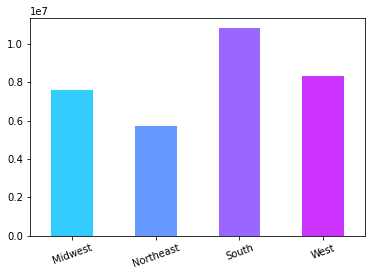

In [273]:
# Create a visual and show how customers are distributed across regions
region_bar = df_opc_merged_2['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('cool', 4))
plt.xticks(rotation= 20, horizontalalignment="center")

#### Sales are higher in the South region. The lowest region is the Northeast. I would suggest marketing across all regions, however, a lower placement in the South, just to maintain the customer base and keep people slowly ordering. A higher saturation in the Northeast in increase sales and the customer base, and a slight increase in marketing in the West and Midwest regions. 

In [274]:
# Export region_bar
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'))

In [275]:
# crosstab for ordering habits based on a customer’s region
department_region = pd.crosstab(df_opc_merged_2['department_name'], df_opc_merged_2['region'], dropna = False)

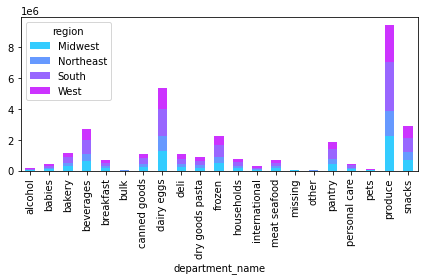

In [276]:
# Create a visual showing ordering habits based on customer’s region
department_region_bar = department_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

#### This visual can be used to see which products are selling better in which region. For instance, the produce department is favored bt re South region, but the West and Midwest are close to those numbers. Probably not a good to market product items to the Northeast, unless you are tryign to increase sales there for a specific item or brand.

In [277]:
# Export department_region_bar
department_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_bar.png'))

In [280]:
# Crosstab for generation and region
gen_region = pd.crosstab(df_opc_merged_2['Generation'], df_opc_merged_2['region'], dropna = False)

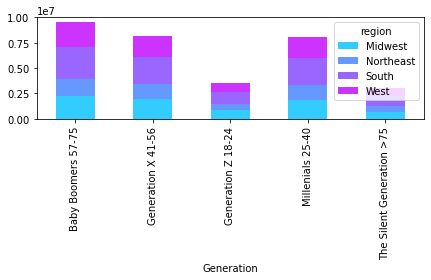

In [281]:
# Create a visual for generations and regions
gen_region_bar= age_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

#### This visual is great to see where the concentration of specific generations are present in the various regions. For example, millenial shoppers are more in the South region than the other regions, or, The South regions most prevalant generation of shoppers is baby boomers. 

In [282]:
# Export gen_region_bar
gen_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gen_region_bar.png'))

In [284]:
# Crosstab for income and region
income_region = pd.crosstab(df_opc_merged_2['Income Bracket'], df_opc_merged_2['region'], dropna = False)

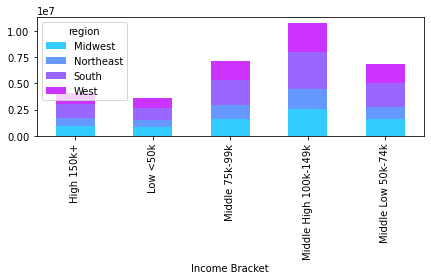

In [285]:
# bar chart for income brackets and regions
income_region_bar = income_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

#### This visual is good to look at where the income brackets fall across the different regions. For example, looking at the Middle high income bracket, which places the most orders, one can see that the South region once again dominates with the most orders placed by this income bracket, as well as having the most amongst any income bracket. 

In [286]:
# Export income_region_bar
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))

##  Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0, 0.5, '')

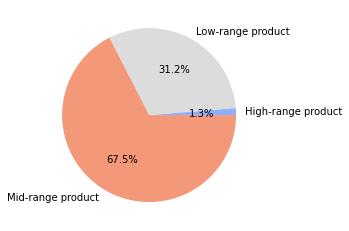

In [287]:
# Create a visual to show simpler price range groupings
product_price_location_pie = df_opc_merged_2['price_range_location'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 3))
plt.ylabel('')

#### Mid range priced products are the most ordered amongst shoppers at a whopping 68%, followed by low range priced products at 31%, and High range priced items in dead last with about 1%. I would be sure that stores are stocking more mid range products and very little, to no high range products. The same goes to to marketing, stick to the bread and butter of mid-range products that consumers need/want.

In [288]:
# Export product_price_location_pie
product_price_location_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_price_location_pie.png'))

In [289]:
# crosstab of departments and price ranges of top selling departments
departments_price_range = pd.crosstab(df_opc_merged_2['department_name'], df_opc_merged_2['price_range_location'], dropna = False)

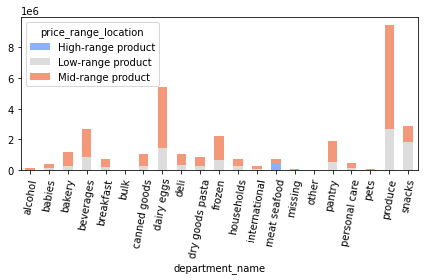

In [292]:
# Create a visual for departments and price ranges
departments_price_range_bar = departments_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 80, horizontalalignment="center")
plt.tight_layout()

This visual just further illistrates how mid-range products are the most successful of the three, and where they are most susscessful, such as in the produce and dairy/egg departments. 

In [293]:
# Export departments_price_range_bar
departments_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_price_range_bar.png'))

In [298]:
# crosstab of spending flag and price ranges
spending_flag_price_range = pd.crosstab(df_opc_merged_2['spending_flag'], df_opc_merged_2['price_range_location'], dropna = False)

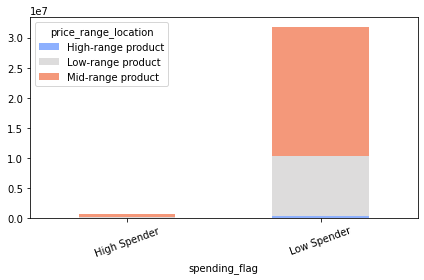

In [299]:
# Create a visual showing the spending flags and price ranges
spending_flag_price_range_bar = spending_flag_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

#### Mid range products are more commonly purchased with low spenders and high spenders alike. The low spenders will purchase a good amount of low-range products, and a majority of the high range products that are sold, which is suprising that the high spenders are spending on more products in the mid range category. 

In [300]:
# Export spending_flag_price_range_bar
spending_flag_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_flag_price_range_bar.png'))

## The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example: What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

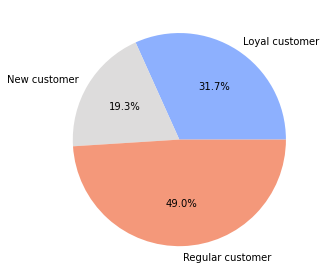

In [301]:
# Create a visual showing the distribution among customers in regards to brand loyalty 
loyalty_pie = df_opc_merged_2['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm',3))
plt.ylabel('')
plt.tight_layout()

#### There is a big opportunity with marketing to new customers, to convert them into regular and loyal customers... dont miss this opportunity and keep the new customers coming in!

## The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example: Are there differences in ordering habits based on a customer’s loyalty status?

In [302]:
# crosstab loyalty status and spending flag
frequency_flag_loyalty_status = pd.crosstab(df_opc_merged_2['frequency_flag'], df_opc_merged_2['loyalty_flag'], dropna = False)

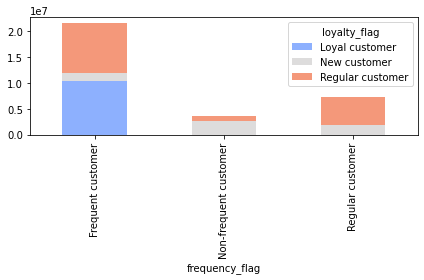

In [303]:
# Create a visual shwoing loyalty status and spending flags
frequency_flag_loyalty_status_bar = frequency_flag_loyalty_status.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.tight_layout()

#### The frequent customers are pretty split between loyal and regular customers. It is normal that so many new customers are in the non-frequent category, however it is import to convert them into regular and loyal customers ASAP. Also, it would be key to target the regular customers that are also non-frequent customers, to get them shopping more often. 

In [308]:
# Export frequency_flag_loyalty_status_bar
frequency_flag_loyalty_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_flag_loyalty_status_bar.png'))

In [309]:
# crosstab gender and order
gender_order_number = pd.crosstab(df_opc_merged_2['gender'], df_opc_merged_2['frequency_flag'], dropna = False)

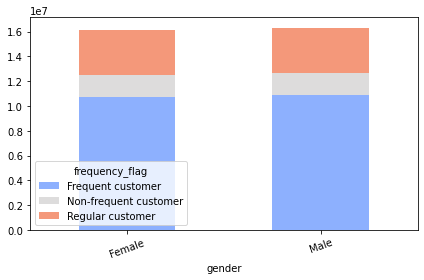

In [310]:
# Create a visual showing the differences between gender and number of orders
gender_order_number_bar = gender_order_number.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

#### This visual confirms that there is not a difference between males or females that use Instacart. They are very evenly split amongst how frequent they shop as well. This is good news as sterotypically females are more prone to shop. From a marketing prespective, keep advertising to both genders equally. 

In [311]:
# Export gender_order_number_bar
gender_order_number_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender_order_number_bar .png'))

## 9. Produce suitable charts to illustrate your results and export them in your project folder.

## 10. Tidy up your script, export your final data set, and save your notebook.

In [313]:
# Export latest df
df_opc_merged_2.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments_merged_4.10.2.pkl'))